### In this mini project we make model to predict cost of health insurance.
Task perform by group members-
- 1- Tejaswini-Data cleaning and explore 
- 2- Saifali-Visualisation and theory
- 3- Amol-Linear Regression
- 4- Tushar-Polynomial Regression

### Tejaswini : Data Cleaning and Exploration

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Accessing the csv dataset in a dataframe

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv("insurance.csv")

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


##### In this data set there are 7 columns. Their names and data types as follows:
- Age-age of the customer
- Sex-gender of the customer
- BMI-Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women
- Children
- Smoker-a person who smokes tobacco regularly.
- Region-give the area wise information of the customer
- Expenses-final cost of the insurance

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
data.shape

(1338, 7)

### Looking at these above exploration we understanding:
   - Dataset has 1338 rows and 7 columns.
   - There are features which are categorical in nature but in int and float type.
   - Later analyse and finalize whether to convert them to categorical or treat as integers.

### Check for Missing Values:

In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
#checking for missing values in the colums
round(100*(data.isnull().sum()/len(data)),2).sort_values(ascending = False)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
expenses    0.0
dtype: float64

In [10]:
#checking for missing values in the rows
round(100*(data.isnull().sum(axis=1)/len(data)),2).sort_values(ascending = False)

0       0.0
898     0.0
896     0.0
895     0.0
894     0.0
       ... 
445     0.0
444     0.0
443     0.0
442     0.0
1337    0.0
Length: 1338, dtype: float64

- There are no missing / Null values either in columns or rows

### Checking for Redundancy In The Data

In [11]:
data1 = data.copy()

In [12]:
#Checking for duplicates and dropping the entire duplicate row if any
data1.drop_duplicates(subset=None, inplace=True)

In [13]:
data1.shape

(1337, 7)

In [14]:
data.shape

(1338, 7)

The shape after running the drop duplicate command is same as the original dataframe. Hence we can conclude that there were zero duplicate values in the dataset.

## Data Cleaning
- Checking value_counts() for entire dataframe.

In [15]:
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [16]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [17]:
data["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

- There seems to be no unknown values in the entire dataset.

### Coverting the categorical data into category type for futher analysis or one hot encoding

In [18]:
#Check the datatypes before conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
data1 = pd.get_dummies(data, drop_first=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   expenses          1338 non-null   float64
 4   sex_male          1338 non-null   uint8  
 5   smoker_yes        1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.5 KB


As we can see:
- created dummy variable
- Drop original variable for which the dummy was created
- Drop first dummy variable for each set of dummies created.


In [20]:
data1.shape

(1338, 9)

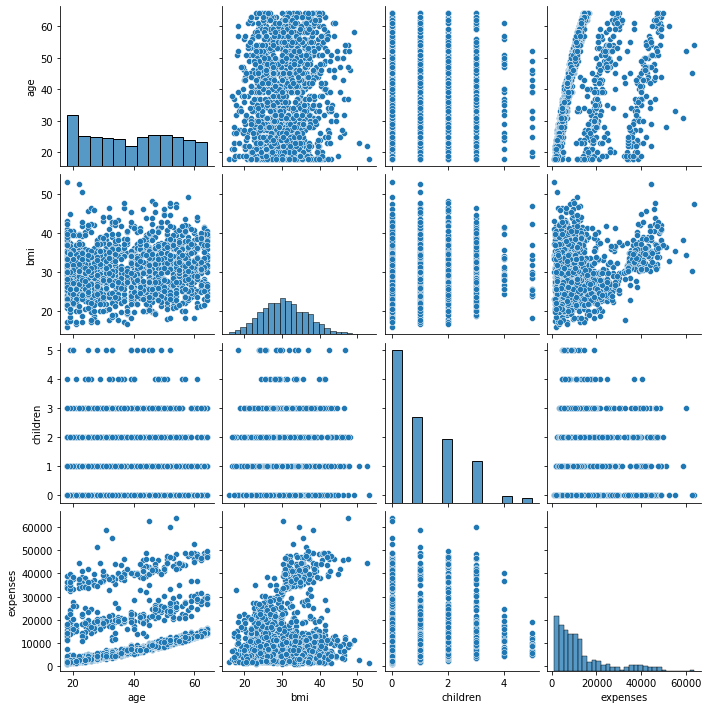

In [21]:
sns.pairplot(data)

# Saif Ali: Visualization

Text(0, 0.5, 'expenses')

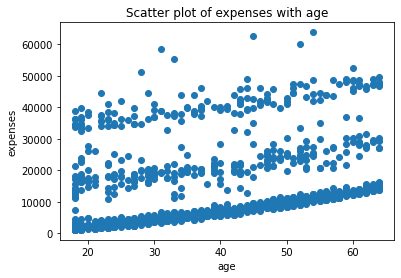

In [26]:
plt.scatter(data['age'],data['expenses'],alpha=1)
plt.title('Scatter plot of expenses with age')
plt.xlabel('age')
plt.ylabel('expenses')

In this scatterd plot it can be observed that these columns and rows are suitable for polynomial regression.

Text(0, 0.5, 'expenses')

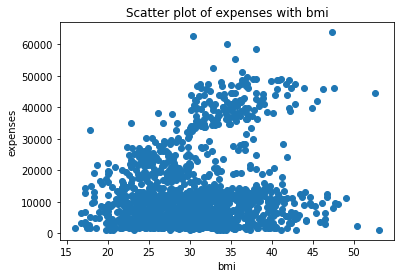

In [27]:
plt.scatter(data['bmi'],data['expenses'],alpha=1)
plt.title('Scatter plot of expenses with bmi')
plt.xlabel('bmi')
plt.ylabel('expenses')

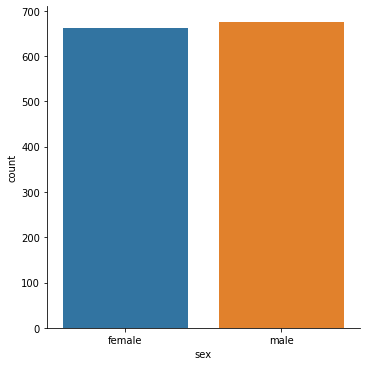

In [28]:
sns.catplot(x = "sex", data = data, kind = "count")

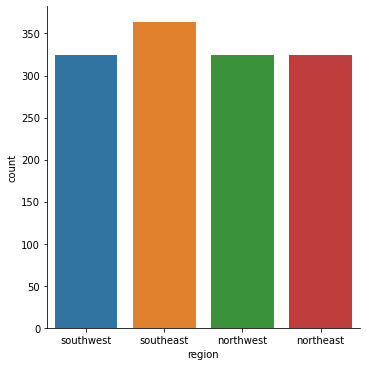

In [29]:
sns.catplot(x = "region",data = data, kind = "count")


<AxesSubplot:xlabel='age', ylabel='Count'>

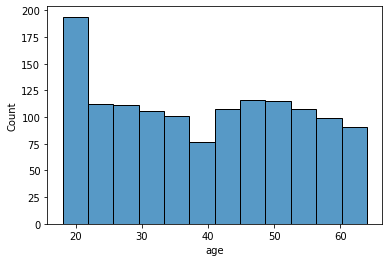

In [30]:
sns.histplot(x = "age",data = data)

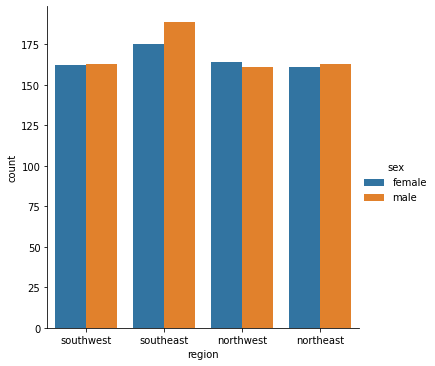

In [31]:
sns.catplot(x = "region", data = data, kind = "count", hue = "sex")

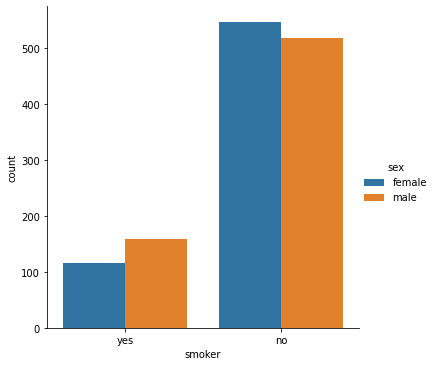

In [32]:
sns.catplot(x = "smoker", data = data, kind = "count", hue = "sex")

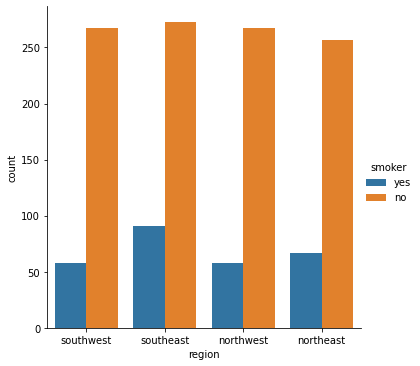

In [33]:
sns.catplot(x = "region", data = data, kind = "count", hue = "smoker")

# SPLITTING THE DATA
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
- We will use train_test_split method from sklearn package for this

In [62]:
from sklearn.model_selection import train_test_split

#'random_state' so that the train and test data set always have the same rows, respectively
train_data, test_data = train_test_split(data1, test_size = 0.20)

- Verify the info and shape of the dataframes after split:

In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 73 to 1316
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1070 non-null   int64  
 1   bmi               1070 non-null   float64
 2   children          1070 non-null   int64  
 3   expenses          1070 non-null   float64
 4   sex_male          1070 non-null   uint8  
 5   smoker_yes        1070 non-null   uint8  
 6   region_northwest  1070 non-null   uint8  
 7   region_southeast  1070 non-null   uint8  
 8   region_southwest  1070 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 47.0 KB


In [64]:
train_data.shape

(1070, 9)

In [65]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 952 to 1010
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               268 non-null    int64  
 1   bmi               268 non-null    float64
 2   children          268 non-null    int64  
 3   expenses          268 non-null    float64
 4   sex_male          268 non-null    uint8  
 5   smoker_yes        268 non-null    uint8  
 6   region_northwest  268 non-null    uint8  
 7   region_southeast  268 non-null    uint8  
 8   region_southwest  268 non-null    uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 11.8 KB


In [38]:
test_data.shape

(268, 9)

### Visualising Numeric Variables (by Tejaswini)
- Let's make a pairplot of all the numeric variables.

In [39]:
train_data.columns

Index(['age', 'bmi', 'children', 'expenses', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

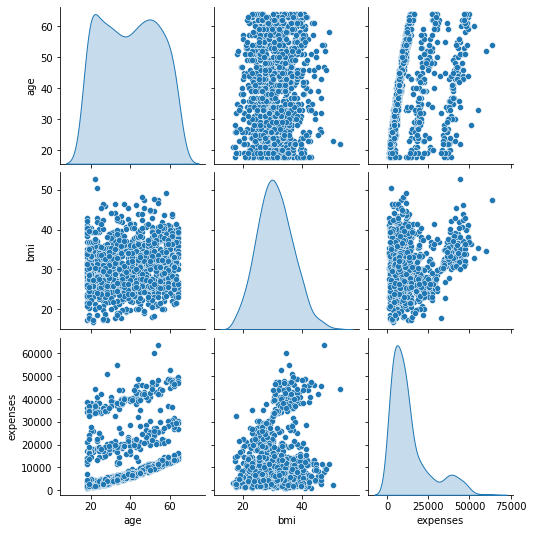

In [40]:
# Create a new dataframe of only numeric variables:

numeric_data = train_data[[ "age", "bmi", "expenses"]]

sns.pairplot(numeric_data, diag_kind='kde')
plt.show()

- The above PairPlot tells us that there is a ***LINEAR RELATION*** between  **"age" and "charges"** and **"bmi" and "charges"**

- Box plot (refer the fig above) to study their effect on the dependent variable ("charges")

## Visualising Catagorical Variables (by Tejaswini)

<AxesSubplot:xlabel='sex', ylabel='expenses'>

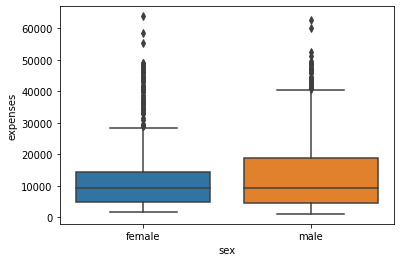

In [41]:
sns.boxplot(x = "sex", y = "expenses", data = data)

- **sex**: data is bit baised towards male , data is represented as 50.5 : 49.5 for male: female . Interquartile range for male is higher compared  to interquartile range for female.

<AxesSubplot:xlabel='children', ylabel='expenses'>

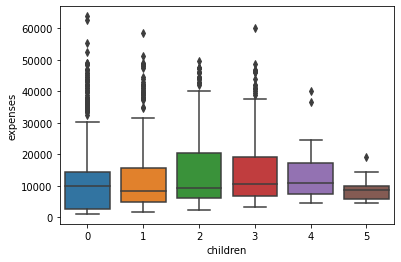

In [42]:
sns.boxplot(x = "children", y = "expenses", data = data)

- **Children** : People have 2 children are having highest data  distribution  between 50 percentile to 75 percentile among all others.

<AxesSubplot:xlabel='smoker', ylabel='expenses'>

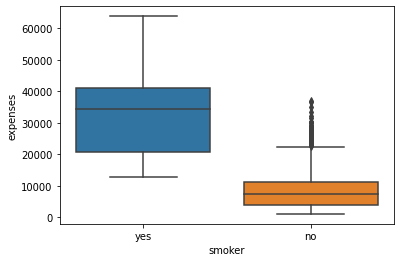

In [43]:
sns.boxplot(x = "smoker", y = "expenses", data = data)

- **smoker**: 20.5 % of our data are smoker. Median for Smokers are quite high compared to people who don't smoke.

<AxesSubplot:xlabel='region', ylabel='expenses'>

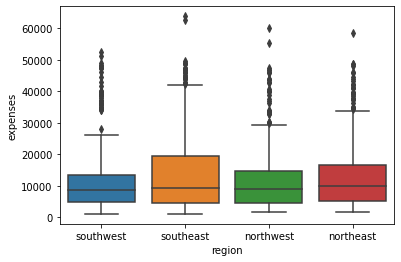

In [44]:
sns.boxplot(x = "region", y = "expenses", data = data)

- **region** : Region as Souteast are having highest data  distribution  between 50 percentile to 75 percentile among all others.

## Correlation Matrix

- Let's check the correlation coefficients to see which variables are highly correlated. Here we are considering only those variables (dataframe: data1) that were chosen for analysis

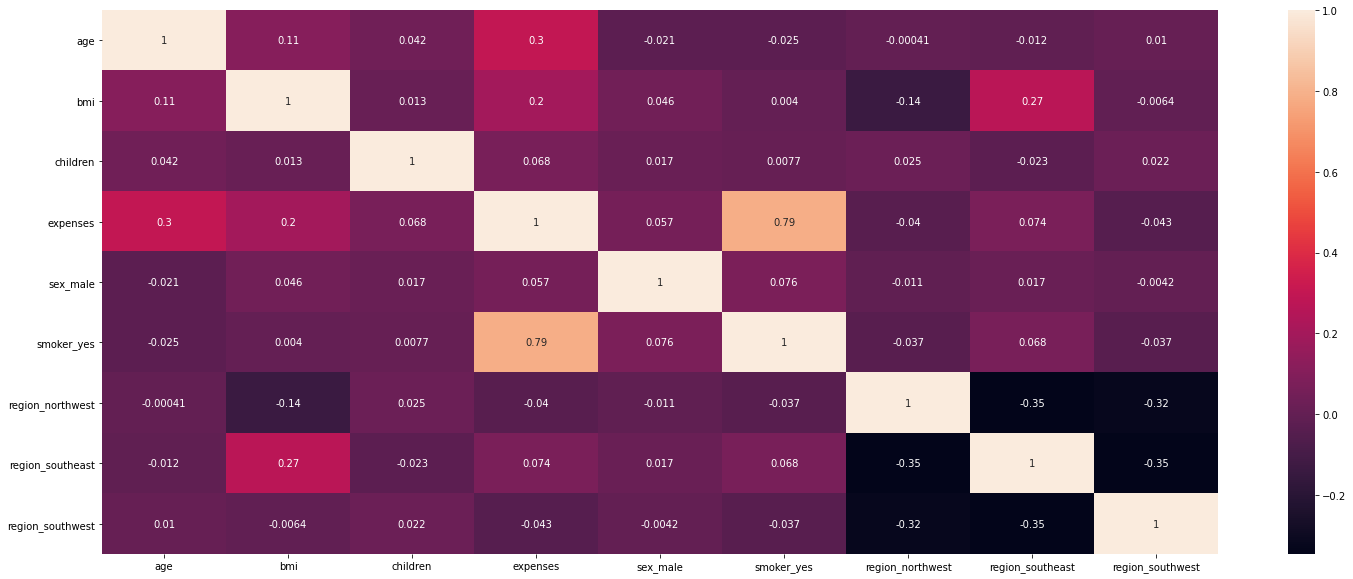

In [45]:
plt.figure(figsize = (25,10))
sns.heatmap(data1.corr(), annot = True)
plt.show()

- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF and for identifying the correct variable to select/eliminate from the model.

### Amol: Linear Regression

In [66]:
print(train_data.head())
print(test_data.head())

     age   bmi  children  expenses  sex_male  smoker_yes  region_northwest  \
73    58  32.0         1  11946.63         1           0                 0   
735   49  34.8         1   9583.89         0           0                 1   
892   54  24.0         0  10422.92         1           0                 0   
964   52  36.8         2  26467.10         1           0                 1   
580   59  25.5         1  12913.99         1           0                 0   

     region_southeast  region_southwest  
73                  1                 0  
735                 0                 0  
892                 0                 0  
964                 0                 0  
580                 0                 0  
      age   bmi  children  expenses  sex_male  smoker_yes  region_northwest  \
952    30  28.4         1   4527.18         0           0                 1   
564    18  32.1         2   2801.26         0           0                 0   
626    36  28.9         3   6748.59       

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [68]:
X_train = train_data.drop('expenses',axis = 1)
X_test = test_data.drop('expenses',axis = 1)
Y_train = train_data.expenses
Y_test = test_data.expenses


In [69]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(1070, 8) (1070,) (268, 8) (268,)


In [70]:
# Independent	age	sex	bmi	children	smoker	region
# Dependent ---> expenses
model = LinearRegression()

In [71]:
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print("R^2 Value: ",model.score(X_test,Y_test))
# print("R^2 Value: ",model.score(Y_test,Y_pred.reshape(-1,1)))

print("Intercept: ",model.intercept_)
print("Coeffient: ",model.coef_)
print("\nUsing Actual (Without Scaling) Data ")
p = pd.DataFrame({"Actaul": Y_test,'Predicted':Y_pred})
print(p)


R^2 Value:  0.774798658661156
Intercept:  -11521.743014579548
Coeffient:  [  258.11224596   329.40821113   476.71285524  -291.19043235
 23871.18433409  -611.69398637  -862.02115658  -881.47293112]

Using Actual (Without Scaling) Data 
        Actaul     Predicted
952    4527.18   5441.836429
564    2801.26   3789.685544
626    6748.59   8429.143275
1146  52590.83  37468.102038
269    9282.48   9810.011307
...        ...           ...
83    11033.66  15734.420524
157   15518.18  25005.358235
1084  15019.76  14869.898398
874    8891.14   8188.183765
1010   8269.04   7496.679074

[268 rows x 2 columns]


In [72]:
def my_model(X_train,Y_train,X_test,Y_test):
    lm = LinearRegression()
    lm.fit(X_train,Y_train)
    ypred = lm.predict(X_test)
    
    return (lm.score(X_test,Y_test)),ypred


In [73]:
def scalling(scaler):
    X_train_scale= scaler.fit_transform(X_train)
    X_test_scale = scaler.fit_transform(X_test)
    return X_train_scale,X_test_scale


In [74]:
X_train_scale_Value ,X_test_scale_Value= scalling(MinMaxScaler())

Rsquare,Y_pred = my_model(X_train_scale_Value ,Y_train,X_test_scale_Value,Y_test)
print("R^2 Value: ",Rsquare)

print("\nUsing MinMaxScaler-----------------------------------------------------------")
p = pd.DataFrame({"Actaul": Y_test,'Predicted':Y_pred})
print(p)


R^2 Value:  0.7730613876794719

Using MinMaxScaler-----------------------------------------------------------
        Actaul     Predicted
952    4527.18   5671.882163
564    2801.26   4009.741029
626    6748.59   8657.838975
1146  52590.83  37686.267477
269    9282.48  10047.077217
...        ...           ...
83    11033.66  15929.905397
157   15518.18  25244.044184
1084  15019.76  15094.273991
874    8891.14   8435.779936
1010   8269.04   7741.845185

[268 rows x 2 columns]


In [75]:
# plt.scatter(range(len(X_test_scale_Value)),Y_test)
# plt.plot(range(len(X_test)),Y_pred)
# print(X_test_scale_Value.shape,Y_test.shape)

In [76]:
X_train_scale_Value ,X_test_scale_Value= scalling(StandardScaler())

Rsquare,Y_pred = my_model(X_train_scale_Value ,Y_train,X_test_scale_Value,Y_test)
print("R^2 Value: ",Rsquare)

print("\nUsing StanardScaler-----------------------------------------------------------")
p = pd.DataFrame({"Actaul": Y_test,'Predicted':Y_pred})
print(p)


R^2 Value:  0.7649479050488309

Using StanardScaler-----------------------------------------------------------
        Actaul     Predicted
952    4527.18   4536.927257
564    2801.26   2823.481893
626    6748.59   7502.788748
1146  52590.83  34465.030376
269    9282.48   8917.978708
...        ...           ...
83    11033.66  14825.292527
157   15518.18  21963.795881
1084  15019.76  14017.264823
874    8891.14   7295.289012
1010   8269.04   6593.738627

[268 rows x 2 columns]


### Tushar: Polynomial Regression

In [77]:
from sklearn.preprocessing import PolynomialFeatures

In [78]:
# X_train = train_data.drop('expenses',axis = 1)
# X_test = test_data.drop('expenses',axis = 1)
# Y_train = train_data.expenses
# Y_test = test_data.expenses


In [79]:
# Polynomial_Features = PolynomialFeatures(degree = 5)
Polynomial_Features = PolynomialFeatures(degree = 7)

In [80]:
X_train_poly = Polynomial_Features.fit_transform(X_train)
X_test_poly = Polynomial_Features.fit_transform(X_test)


In [81]:
linear_model = LinearRegression()
linear_model.fit(X_train_poly,Y_train)
ypred = linear_model.predict(X_test_poly)
rsquare = linear_model.score(X_train_poly,Y_train)

In [57]:
print("R^2 Value: ",rsquare)
print("\nUsing Polynomial Regression -----------------------------------------------------------")
d = pd.DataFrame({'Actual':Y_test,'Predicted':ypred})

print(d)

R^2 Value:  0.9633607538250147

Using Polynomial Regression -----------------------------------------------------------
        Actual      Predicted
15     1837.24  -12617.670090
925   25333.33   65675.802384
128   32734.19 -384429.376093
163    5152.13   10755.710724
464    1632.04   -1543.251251
...        ...            ...
1311   4571.41    5581.905442
498    8211.10    7916.789609
6      8240.59    9026.594920
1315  11272.33 -145305.204985
684    4766.02    1865.311481

[268 rows x 2 columns]


### Conclusion:

#### Regression analysis a model that describe the relation between the dependent variable and independent variable in a simplified mathematical function will best describe such relationship or simple assumption have made that is the case by using polynomial regression.After the polynomail Regression analysis of the Data we got the accuracy of the prediction is 97%. It shows the increment in accuracy of given dataset.